# Linear Regression

## In this notebook you will see the following:
1. Loading of a dataset.
1. Preprocessing the data for linear regression.
1. Computing the cost and performimg gradient descent in pure numpy in vectorized form.
1. Fitting a linear regression model using a single feature.
1. Visualition of results using matplotlib.
1. Multivariate linear regression.
1. Polynomial regression.
1. Experiments with adaptive learning rates.

In [53]:
import numpy as np # used for scientific computing
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for visualization and plotting

np.random.seed(42) 

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Data Preprocessing

For the following notebook, we will use a dataset containing housing prices in King County, USA. The dataset contains 5,000 observations with 18 features and a single target value - the house price. 

First, we will read and explore the data using pandas and the `.read_csv` method.

In [54]:
# Read comma separated data
df = pd.read_csv('data.csv') # Make sure this cell runs regardless of your absolute path.
# df stands for dataframe, which is the default format for datasets in pandas

### Data Exploration
A good practice in any data-oriented project is to first try and understand the data. We will Start by looking at the top of the dataset using the `df.head()` command. This will be the first indication that you read your data properly, and that the headers are correct. Next, we can use `df.describe()` to show statistics on the data and check for trends and irregularities.

In [55]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [56]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.000000e+03,5.000000e+03,5000.0000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,4.630823e+09,5.394699e+05,3.3714,2.062150,2061.036800,1.615893e+04,1.432600,0.009400,0.243000,3.455000,7.595200,1753.151000,1966.660800,95.052800,98078.812600,47.559312,-122.215864,1976.84520,13451.164600
std,2.870890e+09,3.873115e+05,0.9104,0.773592,923.727509,4.600220e+04,0.510793,0.096506,0.774643,0.677692,1.166537,818.390844,28.286855,425.234932,54.126332,0.139521,0.141807,674.73601,26514.749009
min,1.000102e+06,7.500000e+04,0.0000,0.000000,380.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.00000,660.000000
25%,2.154075e+09,3.179062e+05,3.0000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1949.000000,0.000000,98033.000000,47.463675,-122.329000,1490.00000,5391.500000
50%,4.022900e+09,4.490000e+05,3.0000,2.000000,1890.000000,7.875000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,1968.000000,0.000000,98070.000000,47.572850,-122.235000,1820.00000,7800.000000
75%,7.345078e+09,6.500000e+05,4.0000,2.500000,2500.000000,1.123400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,1990.000000,0.000000,98118.000000,47.679200,-122.129000,2340.00000,10469.250000
max,9.842300e+09,7.060000e+06,9.0000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.00000,434728.000000


We will start with one variable linear regression by extracting the target column and the `sqft_living` variable from the dataset. We use pandas and select both columns as separate variables and transform them into a numpy array.

In [57]:
X = df['sqft_living'].values
y = df['price'].values

## Preprocessing

As the number of features grows, calculating gradients gets computationally expensive. We can speed this up by normalizing the input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes. 
Now we will implement the cost function `preprocess`.

In [58]:
def preprocess(X, y):
    """
    Perform mean normalization on the features and true labels.

    Input:
    - X: Inputs (n features over m instances).
    - y: True labels.

    Returns a two vales:
    - X: The mean normalized inputs.
    - y: The mean normalized labels.
    """
    x_temp = (X - np.mean(X, axis = 0)) / ((np.max(X, axis = 0) - np.min(X, axis = 0))) # multiple vector normalization
    y_temp = (y - np.mean(y)) / ((y.max() - y.min())) # one vector normalization
    X = x_temp
    y = y_temp
    return X, y

In [59]:
X, y = preprocess(X, y)

We will split the data into two datasets: 
1. The training dataset will contain 80% of the data and will always be used for model training.
2. The validation dataset will contain the remaining 20% of the data and will be used for model evaluation. For example, we will pick the best alpha and the best features using the validation dataset, while still training the model using the training dataset.

In [60]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]

## Data Visualization
Another useful tool is data visualization. Since this problem has only two parameters, it is possible to create a two-dimensional scatter plot to visualize the data. Note that many real-world datasets are highly dimensional and cannot be visualized naively. We will be using `matplotlib` for all data visualization purposes since it offers a wide range of visualization tools and is easy to use.

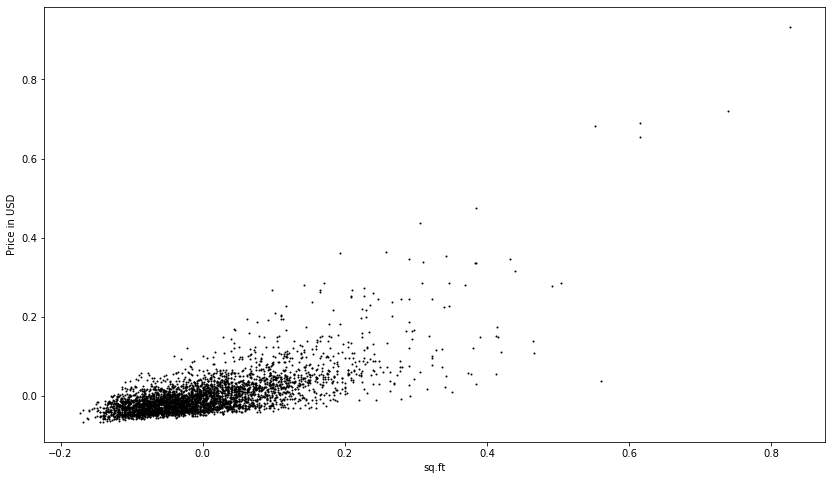

In [61]:
plt.plot(X_train, y_train, 'ro', ms=1, mec='k') # the parameters control the size, shape and color of the scatter plot
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.show()

## Bias Trick

We will make sure that `X` takes into consideration the bias $\theta_0$ in the linear model. We recall that the predications of our linear model are of the form:

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

We will add columns of ones as the zeroth column of the features for both the training and validation sets.

In [62]:

X_train = np.c_[np.ones(len(X_train)),X_train]   # concatanating a column of ones to matrix
X_val = np.c_[np.ones(len(X_val)),X_val]     # concatanating a column of ones to matrix


## Single Variable Linear Regression
Simple linear regression is a linear regression model with a single explanatory varaible and a single target value. 

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

## Gradient Descent 

Our task is to find the best possible linear line that explains all the points in our dataset. We start by guessing initial values for the linear regression parameters $\theta$ and updating the values using gradient descent. 

The objective of linear regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2
$$

where the hypothesis (model) $h_\theta(x)$ is given by a **linear** model:

$$
h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

$\theta_j$ are parameters of our model, by changing those values accordingly we will be able to lower the cost function $J(\theta)$. One way to accopmlish this is to use gradient descent:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In linear regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.

In [63]:
def compute_cost(X, y, theta):
    """
    Computes the average squared difference between an obserbation's actual and
    predicted values for linear regression.  

    Input:
    - X: inputs  (n features over m instances).
    - y: true labels (1 value over m instances).
    - theta: the parameters (weights) of the model being learned.

    Returns a single value:
    - J: the cost associated with the current set of parameters (single number).
    """
    
    J = 0  # Use J for the cost.
    before_sigma = 1 / (2 * len(X)) # before sigma according to cost function 𝐽 formula
    sigma = np.sum((np.dot(X,theta) - y) ** 2)   # sigma according to cost function 𝐽 formula
    J = before_sigma * sigma
    return J

In [64]:
theta = np.array([-1, 2])
J = compute_cost(X_train, y_train, theta)

In [65]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of the model using gradient descent using 
    the *training set*. Gradient descent is an optimization algorithm 
    used to minimize some (loss) function by iteratively moving in 
    the direction of steepest descent as defined by the negative of 
    the gradient. We use gradient descent to update the parameters
    (weights) of our model.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas
    for index in range(num_iters):  # iterating number of times as input
        cost = compute_cost(X, y, theta)  # compute J
        J_history.append(cost)   # insert J to J_history
        temp = theta.copy()
        for j,t in enumerate(theta):  # for each number in theta
            sigma = np.sum((np.dot(X,theta) - y) * X[:,j])   # calculate sigma according to formula
            temp[j] = theta[j] - (alpha / (len(X))) * sigma  #reduce theta according to formula
        theta = temp.copy()
    return theta, J_history

In [66]:
np.random.seed(42)
theta = np.random.random(size=2)
iterations = 40000
alpha = 0.1
theta, J_history = gradient_descent(X_train ,y_train, theta, alpha, iterations)

We can evaluate the learning process by monitoring the loss as training progress. In the following graph, we visualize the loss as a function of the iterations. This is possible since we are saving the loss value at every iteration in the `J_history` array. This visualization might help us find problems with our code. We Notice that since the network converges quickly, we are using logarithmic scale for the number of iterations. 

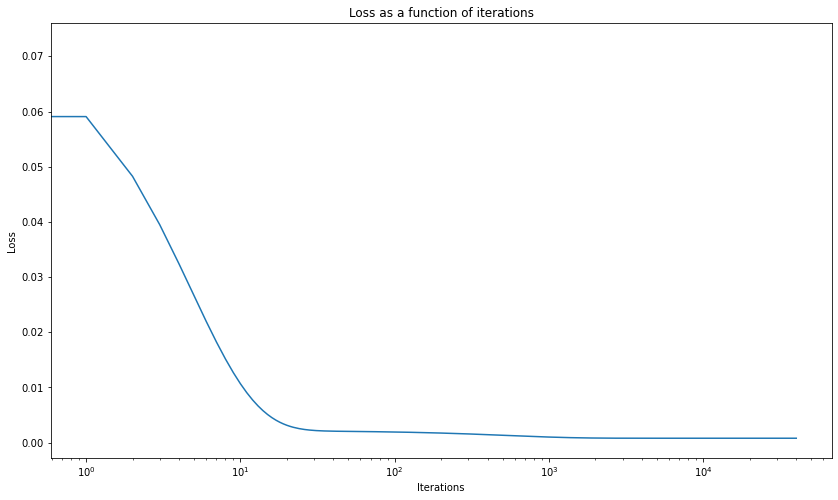

In [67]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.show()

Here we implement the pseudo-inverse function `pinv`- calculating the optimal values of the parameters using the pseudoinverse
approach using the *training set*.

In [68]:
def pinv(X, y):
    """
    Calculate the optimal values of the parameters using the pseudoinverse
    approach as you saw in class using the *training set*.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).

    Returns two values:
    - theta: The optimal parameters of your model.

    ########## DO NOT USE np.linalg.pinv ##############
    """
    
    pinv_theta = []
    pinv_x = np.linalg.inv(X.T @ X) @ X.T  # calculate pinv according to formula
    theta = pinv_x.dot(y)
    for i in theta:
        pinv_theta.append(i)
    return pinv_theta

In [69]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

We can add the loss value for the theta calculated using the psuedo-inverse to our graph. This is another sanity check as the loss of our model should converge to the psuedo-inverse loss.

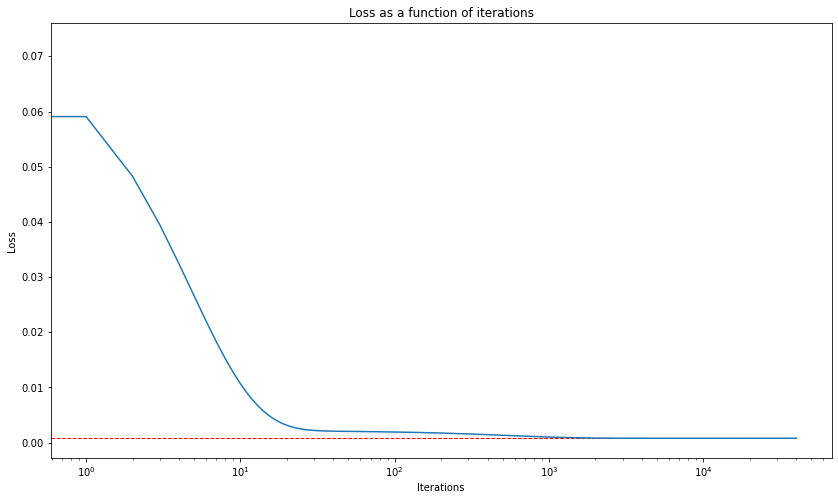

In [70]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

We can use a better approach for the implementation of `gradient_descent`. Instead of performing 40,000 iterations, we wish to stop when the improvement of the loss value is smaller than `1e-8` from one iteration to the next.

In [71]:
def efficient_gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of your model using the *training set*, but stop 
    the learning process once the improvement of the loss value is smaller 
    than 1e-8. This function is very similar to the gradient descent 
    function you already implemented.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas
    for i in range(num_iters):  # same process as gradient decent
        cost = compute_cost(X, y, theta)
        J_history.append(cost) 
        if(i != 0 and (J_history[i-1] - J_history[i]) < 1e-8):  # if improvement of the loss value is smaller than 1e-8 - stop process
            break
        temp = theta.copy()
        for j,t in enumerate(theta):
            sigma = np.sum((np.dot(X,theta) - y) * X[:,j])
            temp[j] = theta[j] - (alpha/(len(X))) * sigma  
            
        theta = temp.copy()
    
    return theta, J_history

The learning rate is another factor that determines the performance of our model in terms of speed and accuracy. We know will find the best 'alpha' to use as our hyperparameter.

In [72]:
def find_best_alpha(X_train, y_train, X_val, y_val, iterations):
    """
    Iterate over provided values of alpha and train a model using the 
    *training* dataset. maintain a python dictionary with alpha as the 
    key and the loss on the *validation* set as the value.

    Input:
    - X_train, y_train, X_val, y_val: the training and validation data
    - iterations: maximum number of iterations

    Returns:
    - alpha_dict: A python dictionary - {key (alpha) : value (validation loss)}
    """
    
    alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
    alpha_dict = {}
  
    np.random.seed(42)
    shape = X_train.shape[1]
    theta_original = np.random.random(shape) #create random theta
    for alpha in alphas: # run efficient gradient descent for each alpha
        theta_finally, J_value = efficient_gradient_descent(X_train, y_train, theta_original, alpha, iterations)
        cost = compute_cost(X_val, y_val, theta_finally) # compute cost for theta found by gradient decent
        alpha_dict[alpha] = cost # insert cost value to alpha key
   
    return alpha_dict

In [73]:
alpha_dict = find_best_alpha(X_train, y_train, X_val, y_val, 40000)

Here we obtain the best learning rate from the dictionary `alpha_dict`. 

In [74]:

best_alpha = min(alpha_dict, key = alpha_dict.get)  # find minimum value in dictionary = minimum cost = best alpha


Here we pick the best three alpha values we just calculated and provide **one** graph with three lines indicating the training loss as a function of iterations.

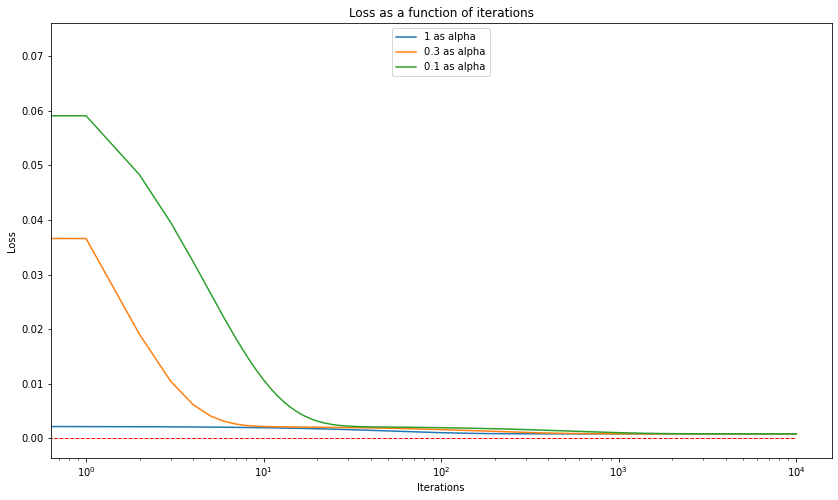

In [75]:
best_three_alpha= []
J_history_cost =[]
alpha_dict_copy = alpha_dict.copy()
np.random.seed(42)
theta_random = np.random.random(size=2)

for i in range(3):
    best_three_alpha.append(min(alpha_dict_copy,key=alpha_dict_copy.get))
    alpha_dict_copy.pop(best_three_alpha[i])

for alpha in best_three_alpha:
    _,temp = gradient_descent(X_train, y_train, theta_random ,alpha,10000)
    J_history_cost.append(temp)
    
for i in range(3):
    temp_lable = str(best_three_alpha[i]) + ' as alpha'
    plt.plot(np.arange(10000), J_history_cost[i], label = temp_lable)
    
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.hlines(y = 0 , xmin = 0, xmax = 10000, color='r', linewidth = 1, linestyle = 'dashed')
plt.legend(loc= "upper center");
plt.show()


This is yet another sanity check. This function plots the regression lines of our model and the model based on the pseudoinverse calculation. Both models should exhibit the same trend through the data. 

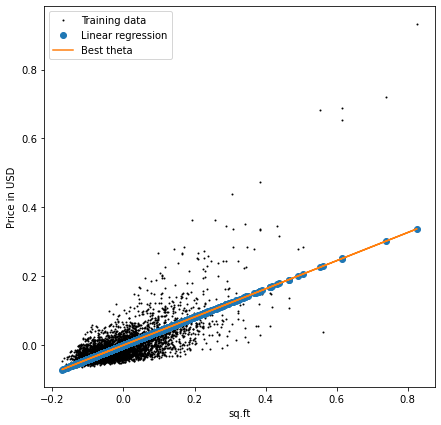

In [76]:
plt.figure(figsize=(7, 7))
plt.plot(X_train[:,1], y_train, 'ro', ms=1, mec='k')
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.plot(X_train[:, 1], np.dot(X_train, theta), 'o')
plt.plot(X_train[:, 1], np.dot(X_train, theta_pinv), '-')

plt.legend(['Training data', 'Linear regression', 'Best theta']);

## Multivariate Linear Regression

In most cases, we will deal with databases that have more than one feature. It can be as little as two features and up to thousands of features. In those cases, we use a multiple linear regression model. The regression equation is almost the same as the simple linear regression equation:

$$
\hat{y} = h_\theta(\vec{x}) = \theta^T \vec{x} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n
$$

In [77]:
# Read comma separated data
df = pd.read_csv('data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


## Preprocessing

Like in the single variable case, we need to create a numpy array from the dataframe. Before doing so, we should notice that some of the features are clearly irrelevant.

In [78]:
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

In [79]:
# preprocessing
X, y = preprocess(X, y)

In [80]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

Using 3D visualization, we can still observe trends in the data.

C:\Users\danwa\AppData\Local\Temp/ipykernel_10112/187571787.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


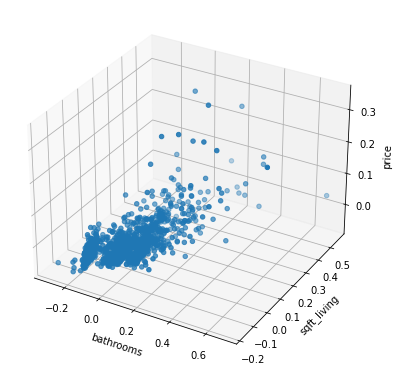

In [81]:
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
xx = X_train[:, 1][:1000]
yy = X_train[:, 2][:1000]
zz = y_train[:1000]
ax.scatter(xx, yy, zz, marker='o')
ax.set_xlabel('bathrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.show()

Here we use the bias trick again (add a column of ones as the zeroth column in the both the training and validation datasets).

In [82]:
X_train = np.c_[np.ones(len(X_train)),X_train]  # concatanating a column of ones to matrix
X_val = np.c_[np.ones(len(X_val)),X_val]  # concatanating a column of ones to matrix

Here we get our theta from the gradient_descent function

In [83]:
shape = X_train.shape[1]
theta = np.ones(shape)
J = compute_cost(X_train, y_train, theta)

In [84]:
np.random.seed(42)
shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40000
theta, J_history = gradient_descent(X_train ,y_train, theta, best_alpha, iterations)

In [85]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

We can use visualization to make sure the code works well. Notice we use logarithmic scale for the number of iterations, since gradient descent converges after ~500 iterations.

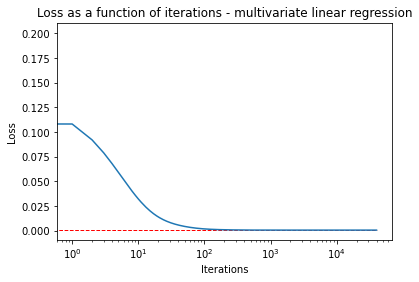

In [86]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - multivariate linear regression')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

## Polynomial Regression 
Linear Regression allows us to explore linear relationships but if we need a model that describes non-linear dependencies we can also use Polynomial Regression. In order to perform polynomial regression, we create additional features using a function of the original features and use standard linear regression on the new features. For example, consider the following single variable $(x)$ cubic regression:

$$ x_0 = 1, \space x_1 = x, \space x_2 = x^2, \space x_3 = x^3$$

And after using standard linear regression:

$$ f(x) = \theta_0 + \theta_1 x + \theta_2 x^2 +  \theta_3 x^3$$

As required. 

Here we use polynomial regression by using all **quadratic** feature combinations: 

$$ 1, x, y, z, x^2, y^2, z^2, xy, xz, yz, ...$$

and evaluate the MSE cost on the training and testing datasets.

In [87]:
columns_to_drop = ['price', 'id', 'date']
all_features = df.drop(columns=columns_to_drop)
all_features.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [88]:
# creating polynomial matrix
poly_x = all_features.values.copy()  # making a copy of all_features values 
columns_all_features= all_features.values  # making a pointer to all_features values
poly_y = df['price'].values  # creating y vector
size_col = np.shape(columns_all_features)[1] # saving the size of column for iteration
for i in range(size_col): # iterating all columns
      for j in range(i, size_col): # iterating all columns from column i
            multy_col = columns_all_features[ :,i] * columns_all_features[ :,j] # multiplying columns
            poly_x = np.insert(poly_x, poly_x.shape[1],multy_col,axis=1)  # adding result to Polynomial matrix

In [89]:
# preprocessing
poly_x, poly_y = preprocess(poly_x, poly_y) 

# training and validation split
np.random.seed(42)
indices = np.random.permutation(poly_x.shape[0])
idx_train, idx_val = indices[:int(0.8*poly_x.shape[0])], indices[int(0.8*poly_x.shape[0]):]
poly_x_train, poly_x_val = poly_x[idx_train,:], poly_x[idx_val,:]
poly_y_train, poly_y_val = poly_y[idx_train], poly_y[idx_val]

# Bias trick
poly_x_train = np.c_[np.ones(len(poly_x_train)),poly_x_train]
poly_x_val = np.c_[np.ones(len(poly_x_val)),poly_x_val]

In [90]:
# running gradent decent on polynomial matrix 
np.random.seed(42)
shape = poly_x_train.shape[1]
theta = np.random.random(shape)
iterations = 40000
theta_poly, J_history_poly = efficient_gradient_descent(poly_x_train ,poly_y_train, theta, best_alpha, iterations)

In [91]:
# computing cost for polynomial train and polynomial validation
J_polynom_regression_train = compute_cost(poly_x_train, poly_y_train, theta_poly)
J_polynom_regression_val = compute_cost(poly_x_val, poly_y_val, theta_poly)

In [92]:
# computing cost for linear train and linear validation and comparing all costs
shape = X_train.shape[1]
theta = np.random.random(shape)
theta, J_history = efficient_gradient_descent(X_train ,y_train, theta, best_alpha, iterations)
J_linear_regression_train = compute_cost(X_train, y_train, theta)
J_linear_regression_val = compute_cost(X_val, y_val, theta)
print("Polynomial regression: The MSE cost on the training datasets is",J_polynom_regression_train,) 
print("Polynomial regression: The MSE cost on the testing datasets is",J_polynom_regression_val)
print("Linear regression: The MSE cost on the training datasets is",J_linear_regression_train) 
print("Linear regression: The MSE cost on the testing datasets is",J_linear_regression_val)

Polynomial regression: The MSE cost on the training datasets is 0.0003564693480497045
Polynomial regression: The MSE cost on the testing datasets is 0.0008943546885081209
Linear regression: The MSE cost on the training datasets is 0.00047487646030168414
Linear regression: The MSE cost on the testing datasets is 0.0004379722112270904


### Comparing the differrent types of regressions we used: 
On the one hand we can see that The MSE cost on the training datasets in polynomial regression is lower (0.0003564693480497045) than the MSE cost on the training datasets in the linear regression (0.00047487646030168414).
On the other hand we can see that The MSE cost on the testing datasets in polynomial regression is higher (0.0008943546885081209) than the MSE cost on the testing datasets in the linear regression (0.0004379722112270904).  

Therefore from this data we can say that we reached over-fitting.
This stems from the fact that polynomial regression is generally used when the points in the data are not captured by the linear regression model and the linear regression fails in describing the best result clearly.
As we increase the degree in the model, it tends to increase the performance of the model. However, increasing the degrees of the model also increases the risk of over-fitting. 

## Adaptive Learning Rate
So far, we kept the learning rate alpha constant during training. However, changing alpha during training might improve convergence in terms of the global minimum found and running time. Here we implement the adaptive learning rate method based on the gradient descent algorithm above. 

Time based decay: this method reduces the learning rate every iteration according to the following formula:

$$\alpha = \frac{\alpha_0}{1 + D \cdot t}$$

Where $\alpha_0$ is the original learning rate, $D$ is a decay factor and $t$ is the current iteration.

In [93]:
def gradient_descent_adaptive(X, y, theta, alpha, num_iters, D):
    """
    Learn the parameters of the model using gradient descent using 
    the *training set*. Gradient descent is an optimization algorithm 
    used to minimize some (loss) function by iteratively moving in 
    the direction of steepest descent as defined by the negative of 
    the gradient. We use gradient descent to update the parameters
    (weights) of our model. We use an adaptive learning rate with D.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The original learning rate.
    - num_iters: The number of updates performed.
    - D: The Decay Factor

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    alpha_0 = alpha
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas
    ###########################################################################
    # TODO: Implement the gradient descent optimization algorithm.            #
    ###########################################################################
    for i in range (num_iters):
        cost = compute_cost(X, y, theta)
        J_history.append(cost)
        temp = theta.copy()
        for index, t in enumerate(theta):
            sigma = np.sum(((X@theta)-y) * X[:,index])
            temp[index] = theta[index] - (alpha/len(X)) * sigma
        theta = temp.copy()
        alpha = alpha_0 / (1 + i * D)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return theta, J_history

In [94]:
# taking relevant data out of table
X = df['sqft_living'].values
y = df['price'].values

# Preprocessing 
X, y = preprocess(X, y)

# splitting data to train and validation
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]

# bias trick
X_train = np.c_[np.ones(len(X_train)),X_train]
X_val = np.c_[np.ones(len(X_val)),X_val]

In [95]:
# creating adaptive and constant gradient descent with values we found
np.random.seed(42)
shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40000

D = 0.000005
alpha =1.9995
theta_constant, J_history_constant_train = gradient_descent(X_train ,y_train, theta, alpha, iterations)
theta_adaptive, J_history_adaptive_train = gradient_descent_adaptive(X_train ,y_train, theta, alpha, iterations, D)
cost_constant = compute_cost(X_val, y_val, theta_constant)
cost_adaptive = compute_cost(X_val, y_val, theta_adaptive)

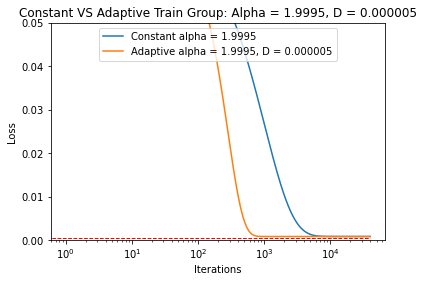

Cost in validation for constant training with alpha = 1.9995 is:  0.0007084282458054094
Cost in validation for adaptive training with alpha_0 = 1.9995 and D = 0.000005 is:  0.0007084282449873634


In [96]:
# creating graphs for train
plt.plot(np.arange(iterations), J_history_constant_train, label = "Constant alpha = 1.9995")
plt.plot(np.arange(iterations), J_history_adaptive_train, label = "Adaptive alpha = 1.9995, D = 0.000005")
plt.legend(loc='upper center')
plt.xscale('log')
plt.ylim(0, 0.05)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Constant VS Adaptive Train Group: Alpha = 1.9995, D = 0.000005')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history_constant_train), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()
print("Cost in validation for constant training with alpha = 1.9995 is: ", cost_constant)
print("Cost in validation for adaptive training with alpha_0 = 1.9995 and D = 0.000005 is: ", cost_adaptive)

In this diagram above we can see the diffrence between constant alpha and an adaptive alpha.
With these parameters it is obvious that adaptive alpha is better, when constant alpha is set to 1.9995,
it is not as efficient as an adaptive alpha that starts with 1.9995 and D is 0.000005. Adaptive learning rate 
converges quicker. And the cost of the adaptive training is even slightly lower on the validation group.

In [97]:
# comparing diffrent D's with alpha_0 = 2 and constant alpha = 2
D_list = [0.001, 0.0001, 0.00001, 0.000001]
J_history_adaptive_train = []
adaptive_costs = []
alpha = 2

for i in D_list:
    theta_temp, J_history_adaptive_temp = gradient_descent_adaptive(X_train ,y_train, theta, alpha, iterations, i)
    J_history_adaptive_train.append(J_history_adaptive_temp)
    adaptive_costs.append(compute_cost(X_val, y_val, theta_temp))
    
constant_theta, J_history_constant_train = gradient_descent(X_train ,y_train, theta, alpha, iterations)
cost_constant = compute_cost(X_val, y_val, constant_theta)

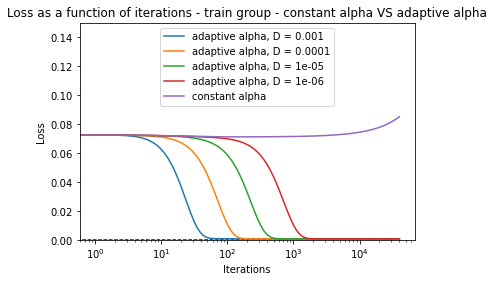

Cost in validation for adaptive training with alpha_0 = 2 and D =  0.001  is:  0.0007084282449873645
Cost in validation for adaptive training with alpha_0 = 2 and D =  0.0001  is:  0.0007084282449873636
Cost in validation for adaptive training with alpha_0 = 2 and D =  1e-05  is:  0.0007084282449873636
Cost in validation for adaptive training with alpha_0 = 2 and D =  1e-06  is:  0.0007084282449873634
Cost in validation for constant training with alpha = 2 is:  0.08536244961088772


In [98]:
# creating graph for train 
for i in range(len(D_list)):
    label_string = "adaptive alpha, D = " + str(D_list[i])
    plt.plot(np.arange(iterations), J_history_adaptive_train[i], label = label_string)
plt.plot(np.arange(iterations), J_history_constant_train, label = "constant alpha")
plt.legend(loc='upper center')
plt.xscale('log')
plt.ylim(0, 0.15)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - train group - constant alpha VS adaptive alpha')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history_constant_train), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

for i in range(len(D_list)):
    print("Cost in validation for adaptive training with alpha_0 = 2 and D = ", D_list[i], " is: ", adaptive_costs[i])
print("Cost in validation for constant training with alpha = 2 is: ", cost_constant)

In these graphs above, We can see that when alpha = 2, the constant alpha method doesn't converge - meaning the cost is very high in validation and train groups, this is because the learning process is "missing" the minimum point.
On the other hand, we can see that for all the D's that we tested, when using Adaptive Learning Rate with alpha_0 = 2, the graph converges for validation and train groups. For D = 0.001 we can see that it converges at less then 500 iterations.

In [99]:
# creating matrix with all features
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values
# preprocessing
X, y = preprocess(X, y)
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]
# bias trick
X_train = np.c_[np.ones(len(X_train)),X_train]  # concatanating a column of ones to matrix
X_val = np.c_[np.ones(len(X_val)),X_val]  # concatanating a column of ones to matrix
# gradient descent and adaptive gradient descent with best alpha
np.random.seed(42)
shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40000


In [100]:
# adaptive gradient descent for train 
D = 0.001
adaptive_theta, J_history_adaptive_train = gradient_descent_adaptive(X_train ,y_train, theta, 1.9, iterations, D)
cost_adaptive = compute_cost(X_val, y_val, adaptive_theta)

In [101]:
# regular gradient descent for train 
const_theta, J_history_constant_train = gradient_descent(X_train ,y_train, theta, best_alpha, iterations)
cost_constant = compute_cost(X_val, y_val, const_theta)

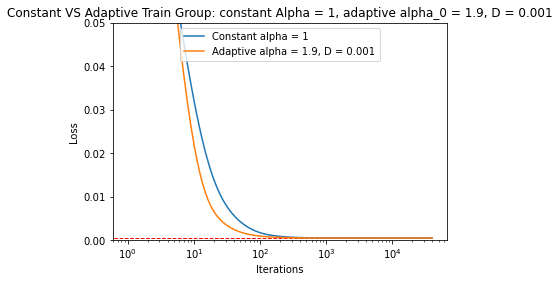

Cost in validation for constant training with alpha = 1 is:  0.00042380404332184666
Cost in validation for adaptive training with alpha_0 = 1.9 and D = 0.001 is:  0.00042378335682087277


In [102]:
# creating graphs for train 
plt.plot(np.arange(iterations), J_history_constant_train, label = "Constant alpha = 1")
plt.plot(np.arange(iterations), J_history_adaptive_train, label = "Adaptive alpha = 1.9, D = 0.001")
plt.legend(loc='upper center')
plt.xscale('log')
plt.ylim(0, 0.05)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Constant VS Adaptive Train Group: constant Alpha = 1, adaptive alpha_0 = 1.9, D = 0.001')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history_constant_train), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()
print("Cost in validation for constant training with alpha = 1 is: ", cost_constant)
print("Cost in validation for adaptive training with alpha_0 = 1.9 and D = 0.001 is: ", cost_adaptive)

In this graph, we used best alpha(1) as our constant alpha, and 1.9 as alpha_0 and D = 0.001 for our adaptive learning rate.
It shows that this adaptive learning rate is even better then the best alpha we found as it converges before it. Also the cost for validation was lower. This time we used all the featurs from our data.
